# KNN based prediction with feature engineering

## Importing necessary modules

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Importing Fruits_Data.csv file

In [2]:
fruits=pd.read_csv('Fruits_Data.csv')

## Setting the maximimum row and column to None

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Exploratory Data Analysis

In [4]:
#print first five rows 
print(fruits.head())
#print the information of the dataframe
fruits.info()
#print the statistics of the data
fruits.describe()

  fruit_name  mass  width  height  color_score
0      apple   192    8.4     7.3         0.55
1      apple   180    8.0     6.8         0.59
2      apple   176    7.4     7.2         0.60
3   mandarin    86    6.2     4.7         0.80
4   mandarin    84    6.0     4.6         0.79
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_name   59 non-null     object 
 1   mass         60 non-null     int64  
 2   width        59 non-null     float64
 3   height       59 non-null     float64
 4   color_score  60 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.5+ KB


,mass,width,height,color_score
count,60.000000,59.000000,59.000000,60.00000
mean,160.833333,7.110169,7.681356,0.76500
std,57.951811,0.817839,1.364005,0.07795
min,12.000000,5.800000,4.000000,0.55000
25%,138.000000,6.600000,7.200000,0.72000
50%,159.000000,7.200000,7.600000,0.75000
75%,176.500000,7.500000,8.200000,0.81000
max,362.000000,9.600000,10.500000,0.93000


## Count plot of the label or target i.e. fruit_name

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

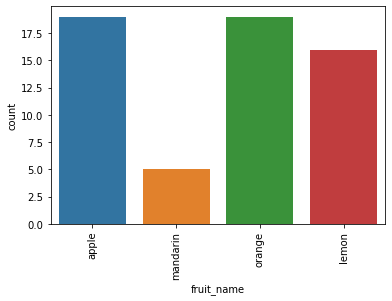

In [5]:
sns.countplot(x='fruit_name', data=fruits)
plt.xticks(rotation=90)

## Drawing Box Plot for Outlier detection, Outlier in one category may be genuine in other category, so we are doing box plotting category wise. 

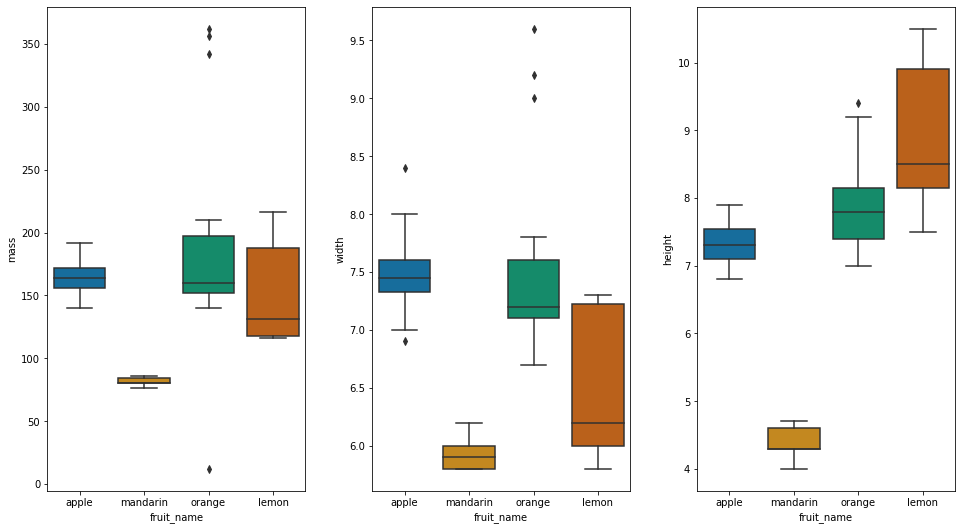

In [6]:
#Set the size of the subplot
plt.rcParams["figure.figsize"] = (14,8)
fig = plt.figure()
#subplot(number of rows, number of columns, plot number)
ax1 = fig.add_subplot(131)
ax = sns.boxplot(y='mass', x='fruit_name', data=fruits, palette="colorblind")
#Spacing between subplots
fig.tight_layout(pad=3)
ax2 = fig.add_subplot(132)
ax = sns.boxplot(y='width', x='fruit_name', data=fruits, palette="colorblind")
fig.tight_layout(pad=3)
ax3 = fig.add_subplot(133)
ax = sns.boxplot(y='height', x='fruit_name', data=fruits, palette="colorblind")

## From the box plot we can observe that there are outliers in width and mass of orange category, we ignore the only one outlier in height as it is very close to the valid range.
## For outlier detection we are using IRQ method and the outlier which are below the valid range are replaced by quartile(0.1) and the outlier which are above the range are replaced by quartile(0.9)

In [7]:
#Supress setting with copy warning
pd.options.mode.chained_assignment = None
IQR = fruits["mass"][fruits['fruit_name'] == 'orange'].quantile(0.75) - fruits["mass"][fruits['fruit_name']=='orange'].quantile(0.25)
lower = fruits["mass"][fruits['fruit_name'] == 'orange'].quantile(0.25) - (IQR * 1.5)
upper = fruits["mass"][fruits['fruit_name'] == 'orange'].quantile(0.75) + (IQR * 1.5)
fruits["mass"][fruits['fruit_name'] == 'orange'] = np.where(fruits["mass"][fruits['fruit_name'] == 'orange'] >upper, fruits["mass"][fruits['fruit_name'] == 'orange'].quantile(0.90),fruits["mass"][fruits['fruit_name'] == 'orange'])
fruits["mass"][fruits['fruit_name'] == 'orange'] = np.where(fruits["mass"][fruits['fruit_name'] == 'orange'] <lower, fruits["mass"][fruits['fruit_name'] == 'orange'].quantile(0.10),fruits["mass"][fruits['fruit_name'] == 'orange'])

#handling outliers on "width" feature of "orange" category
IQR = fruits["width"][fruits['fruit_name'] == 'orange'].quantile(0.75) - fruits["width"][fruits['fruit_name']=='orange'].quantile(0.25)
lower = fruits["width"][fruits['fruit_name'] == 'orange'].quantile(0.25) - (IQR * 1.5)
upper = fruits["width"][fruits['fruit_name'] == 'orange'].quantile(0.75) + (IQR * 1.5)
fruits["width"][fruits['fruit_name'] == 'orange'] = np.where(fruits["width"][fruits['fruit_name'] == 'orange'] >upper, fruits["width"][fruits['fruit_name'] == 'orange'].quantile(0.90),fruits["width"][fruits['fruit_name'] == 'orange'])
fruits["width"][fruits['fruit_name'] == 'orange'] = np.where(fruits["width"][fruits['fruit_name'] == 'orange'] <lower, fruits["width"][fruits['fruit_name'] == 'orange'].quantile(0.10),fruits["width"][fruits['fruit_name'] == 'orange'])

## Rechecking for outlier

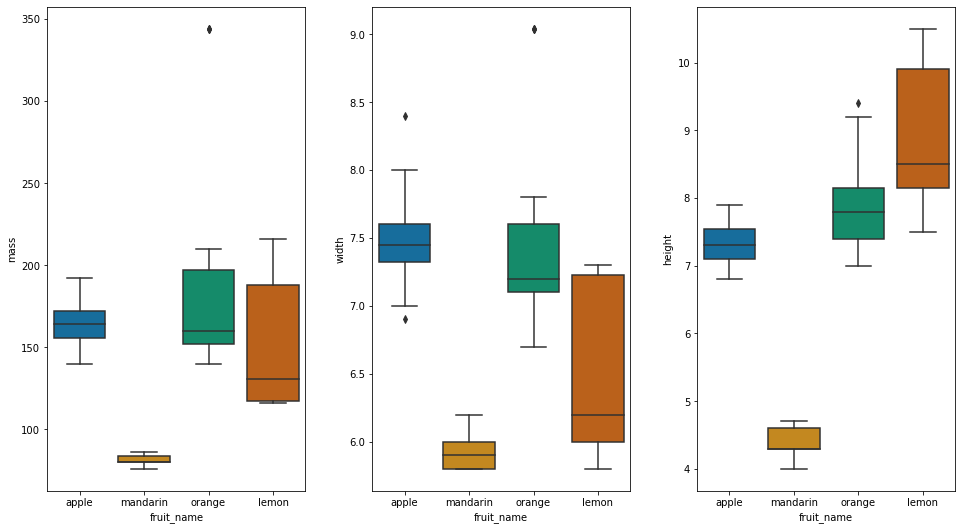

In [8]:
#Set the size of the subplot
plt.rcParams["figure.figsize"] = (14,8)
fig = plt.figure()
#subplot(number of rows, number of columns, plot number)
ax1 = fig.add_subplot(131)
ax = sns.boxplot(y='mass', x='fruit_name', data=fruits, palette="colorblind")
#Spacing between subplots
fig.tight_layout(pad=3)
ax2 = fig.add_subplot(132)
ax = sns.boxplot(y='width', x='fruit_name', data=fruits, palette="colorblind")
fig.tight_layout(pad=3)
ax3 = fig.add_subplot(133)
ax = sns.boxplot(y='height', x='fruit_name', data=fruits, palette="colorblind")

## Some outliers are still there, but we will ignore this and proceed further as the data points are very close to each other, removing outlier further may mislead the model.

## Treatment of Null Values

In [9]:
#display of null values along different features and label
fruits.isnull().sum()

fruit_name     1
mass           0
width          1
height         1
color_score    0
dtype: int64

## Drop the rows where fruit_name is null as null value in label should not be impluted, the entire row should be dropped; replace the null values in width and height feature with median of that category hoping an accurate imputation, we are not replacing the null with the median of whole data.

In [10]:
#delete the row where there is null in fruit_name
fruits.dropna(subset=['fruit_name'], inplace=True)
#replace null with gouup median
s = fruits.groupby('fruit_name')['width'].transform('median')
fruits['width'].fillna(s, inplace=True)
s = fruits.groupby('fruit_name')['height'].transform('median')
fruits['height'].fillna(s, inplace=True)

## Rechecking for the null values

In [11]:
fruits.isnull().sum()

fruit_name     0
mass           0
width          0
height         0
color_score    0
dtype: int64

## Scale all the features to same scale using standard scaler, so that the model will give same weight to all the features

In [12]:
scaler = StandardScaler()
# transform data mass, width, height, color_score
fruits[["mass","width","height","color_score"]] = scaler.fit_transform(fruits[["mass","width","height","color_score"]])

## Check first five rows after scaling

In [13]:
fruits.head()

,fruit_name,mass,width,height,color_score
0,apple,0.559886,1.668302,-0.300551,-2.793595
1,apple,0.333242,1.155179,-0.669978,-2.268684
2,apple,0.257695,0.385495,-0.374436,-2.137456
3,mandarin,-1.442130,-1.153875,-2.221572,0.487100
4,mandarin,-1.479903,-1.410436,-2.295457,0.355872


## check for the correlation of different features among themselves using heatmap

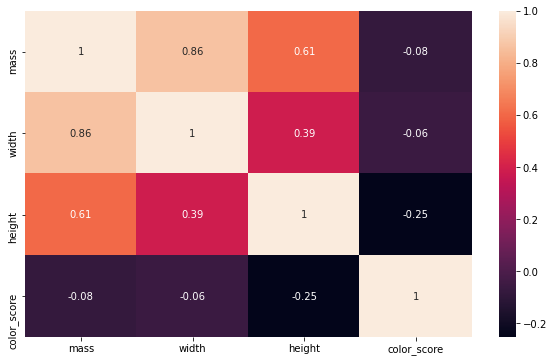

In [14]:
cor=fruits.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

## From the above heatmap we can clearly visualize that width and mass is having high positive correlation, so we can drop one feature out of these two, as the model is not going to learn anything extra from these two features, so we decide to drop the width feature to reduce the complexity of the model and increase the accuracy for unseen data


In [15]:
fruits.drop(columns=["width"],inplace=True)

## Separate each group and plot it in 3d for better visualization

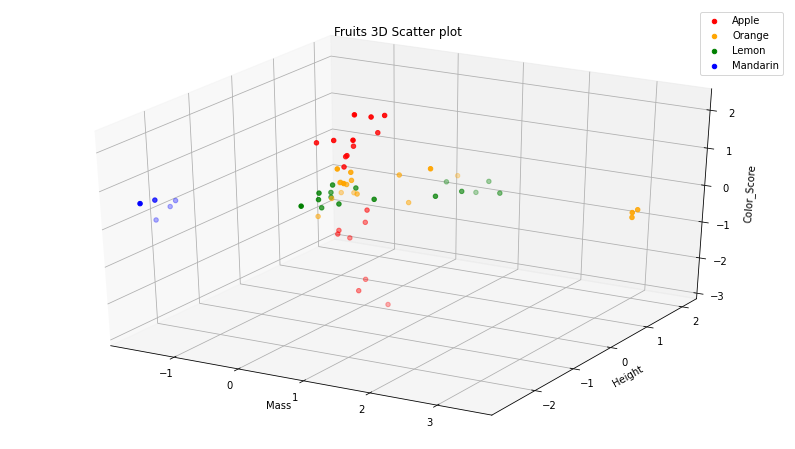

In [16]:
apple_data = fruits[fruits['fruit_name'] == 'apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(apple_data['mass'],apple_data['height'],apple_data['color_score'],color="red",label="Apple")
ax.scatter(orange_data['mass'],orange_data['height'],orange_data['color_score'],color="orange",label="Orange")
ax.scatter(lemon_data['mass'],lemon_data['height'],lemon_data['color_score'],color="green",label="Lemon")
ax.scatter(mandarin_data['mass'],mandarin_data['height'],mandarin_data['color_score'],color="blue",label="Mandarin")
ax.set_title('Fruits 3D Scatter plot')
ax.legend(loc=0)
xLabel = ax.set_xlabel('Mass')
yLabel = ax.set_ylabel('Height')
zLabel = ax.set_zlabel('Color_Score')

## Separate the Features and Labels

In [17]:
X=fruits[['mass','height','color_score']]
Y=fruits['fruit_name']

## Train Test Split of the Data, We are keeping 70% data for Training and 30% for Testing, We have also specified a random state so that every time the program runs it will take the same set of data for training and testing, I have taken 22 as it is my lucky number, You can take any number as random state as you like.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.7, random_state=22)

## Create an object of KNeighborsClassifiers

In [19]:
knn=KNeighborsClassifier(n_neighbors=3) #default n_neighbor=5

## Fit and Train the model with n_neighbors=3, default value is 5

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Test the Accuracy of the Model

In [21]:
knn.score(X_test,y_test)

0.9444444444444444

# Great the accuracy is more than 94%, So we accept the model and proceed further for real prediction.

In [22]:
#We are preding for the below data
query=np.array([[155,7.2,0.9],[40,4.4,0.8],[100,7.9,0.81]])
#Scale down the data as the model is trained with scaled down data
query1=scaler.fit_transform(query)
prediction=knn.predict(query1)
print(query[0],prediction[0],"\n",query[1],prediction[1],"\n",query[2],prediction[2])

[155.    7.2   0.9] apple 
 [40.   4.4  0.8] lemon 
 [100.     7.9    0.81] lemon
